0.8978131776480399


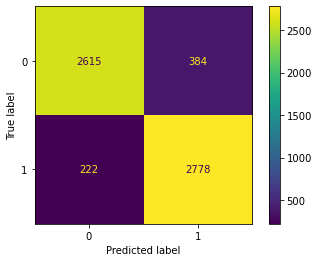

In [17]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Read both datasets
TrainSet = pd.read_csv('TrainingDataBinary.csv')
TestSet = pd.read_csv('TestingDataBinary.csv')

#Seperate the data and the labels 
TrainLabels = TrainSet.iloc[:,128]
TrainSet = TrainSet.drop(TrainSet.columns[128], axis =1)

#Instantiate the PCA and the scaler
pca = PCA(n_components=60)
scaler = StandardScaler()

#Instantiate the Random Forest classifier with its hyperparameters
rf = RandomForestClassifier(max_depth=100, bootstrap=True,\
                            min_samples_leaf=2, min_samples_split=4, n_estimators=200)

#Define the pipeline
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("rf", rf)])


#Get accuracy for each cross validation fold and print the average
scores = cross_val_score(pipe, TrainSet, TrainLabels, cv=5)
print(scores.mean())

#Plot a confusion matrix
y_pred = cross_val_predict(pipe, TrainSet, TrainLabels, cv=5)
conf_mat = confusion_matrix(TrainLabels, y_pred)
ConfusionMatrixDisplay(conf_mat).plot()

#Predict the unknown values
pipe.fit(TrainSet.values, TrainLabels.values)
result = pipe.predict(TestSet.values)




In [18]:
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)